# ARIMA Theory

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.864, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [6]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Fri, 20 Nov 2020   AIC                           2459.074
Time:                        14:27:52   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (Q):                       37.21   Jarque-Bera (JB):                25.33
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4,max_q=4, seasonal=True, trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 20 Nov 2020   AIC                           1019.178
Time:                                     14:27:58   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA and ARIMA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

In [3]:
df1 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [4]:
df2 = pd.read_csv('Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

## ARMA

<AxesSubplot:xlabel='Date'>

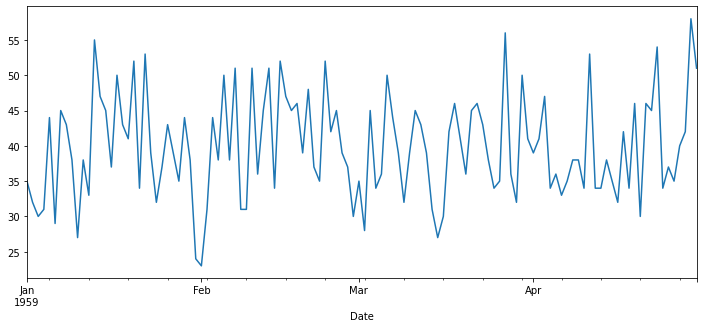

In [5]:
df1['Births'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag = 'AIC')
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# obervations']
    out = pd.Series(result[0:4], index = labels)
    
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [7]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# obervations           1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
auto_arima(df1['Births'], seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.662 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Mon, 23 Nov 2020   AIC                            823.489
Time:                        13:58:39   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [10]:
model = ARMA(train['Births'], order=(2,2))

In [11]:
results = model.fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 23 Nov 2020   AIC                            627.809
Time:                        13:58:39   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
start = len(train)
end = len(train) + len(test) - 1

In [14]:
predictions = results.predict(start, end).rename('ARMA (2,2) Predictions')

<AxesSubplot:xlabel='Date'>

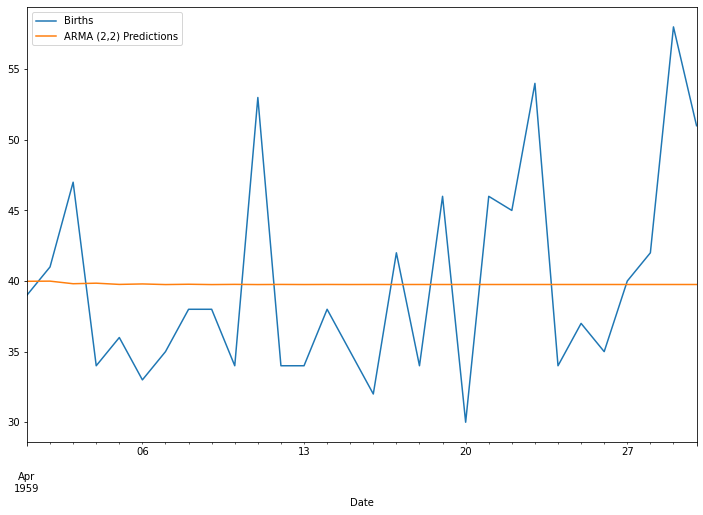

In [15]:
test['Births'].plot(figsize = (12,8), legend=True)
predictions.plot(legend=True)

In [16]:
test.mean()

Births    39.833333
dtype: float64

In [17]:
predictions.mean()

39.777432092745876

<AxesSubplot:xlabel='Date'>

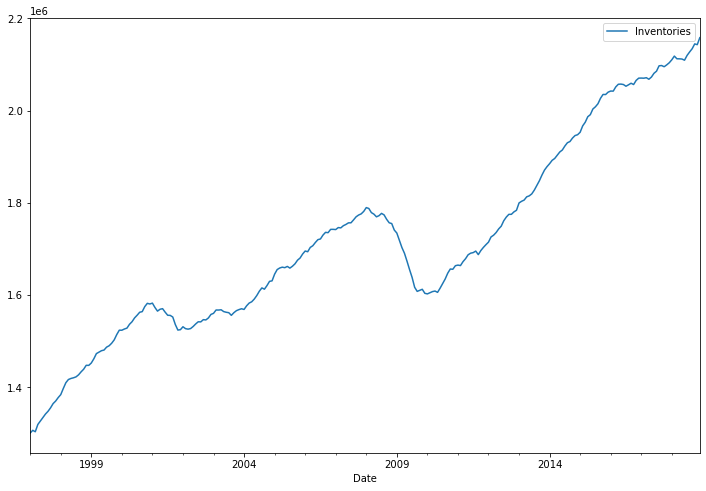

In [18]:
df2.plot(figsize=(12,8))

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

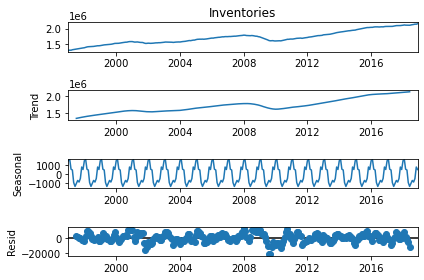

In [20]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [21]:
auto_arima(df2['Inventories'],seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5373.961, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.562 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Mon, 23 Nov 2020   AIC                           5348.037
Time:                        13:58:42   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.statespace.tools import diff

In [23]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [24]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# obervations           258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
df2

,Inventories,Diff_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0
2018-10-01,2144639,10467.0


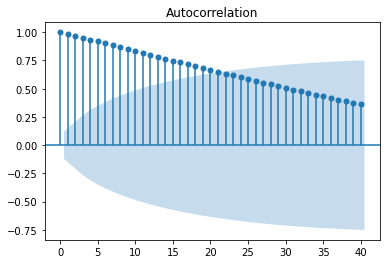

In [33]:
plot_acf(df2['Inventories'], lags=40);

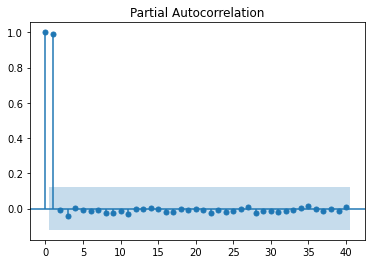

In [34]:
plot_pacf(df2['Inventories'], lags=40);

In [35]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0, start_q=0,
                          max_p=2, max_q=2, seasonal=False, trace=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.230 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 20 Nov 2020   AIC                           5348.037
Time:                        14:28:12   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [37]:
train

,Inventories,Diff_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2017-08-01,2097163,11650.0
2017-09-01,2097753,590.0
2017-10-01,2095167,-2586.0


In [122]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Thu, 15 Oct 2020   AIC                           4980.790
Time:                        13:01:13   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.869      2.378      0.017     561.674    5833.465
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [131]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start, end, typ='levels').rename('ARIMA(1,1,1) Predictions')

<AxesSubplot:xlabel='Date'>

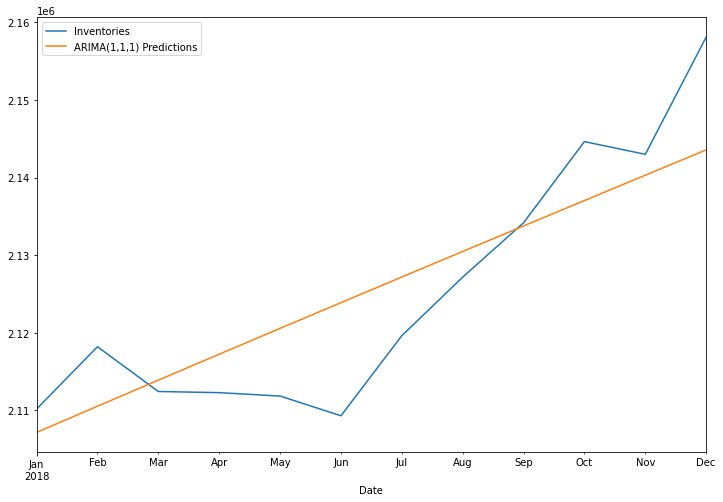

In [132]:
test['Inventories'].plot(figsize = (12,8), legend=True)
predictions.plot(legend=True)

In [133]:
from statsmodels.tools.eval_measures import rmse

In [134]:
error = rmse(test['Inventories'], predictions)

In [135]:
error

7789.5973836593785

In [136]:
test['Inventories'].mean()

2125075.6666666665

In [137]:
predictions.mean()

2125465.272049339

## FORECAST INTO UNKNOWN FUTURE

In [138]:
model = ARIMA(df2['Inventories'], order=(1,1,1))

In [139]:
results = model.fit()

In [140]:
fcast = results.predict(start =len(df2),end=len(df2)+11, typ='levels').rename('ARIMA (1,1,1) FORECAST')

<AxesSubplot:xlabel='Date'>

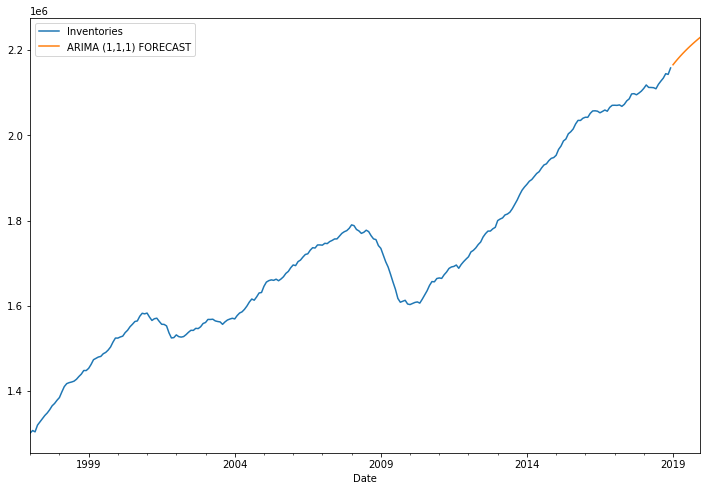

In [141]:
df2['Inventories'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)

# SARIMA

In [142]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [145]:
df = pd.read_csv('Data/co2_mm_mlo.csv')

In [146]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [147]:
# dict(year=df['year'], month=df['month'], day=1)

df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'],'day':1})

In [148]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [150]:
df = df.set_index('date')

In [151]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [152]:
df.index.freq = 'MS'

In [153]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<AxesSubplot:xlabel='date'>

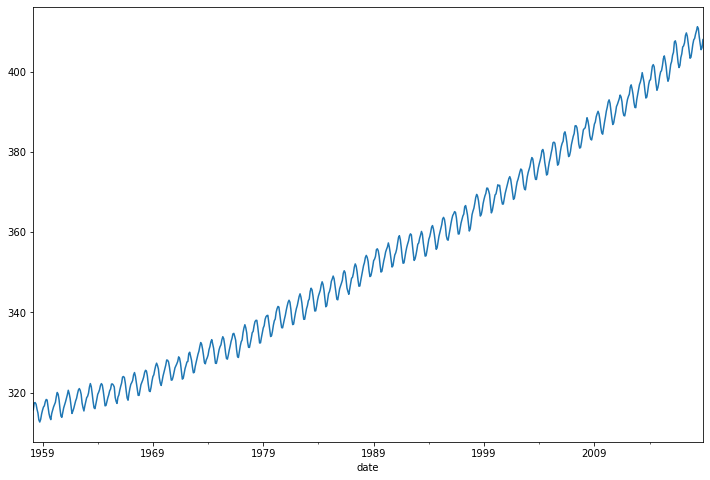

In [154]:
df['interpolated'].plot(figsize=(12,8))

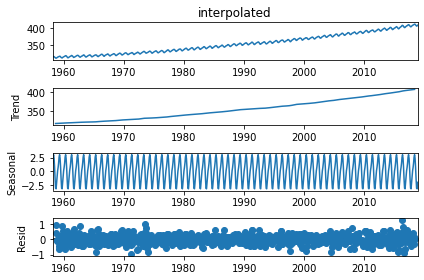

In [158]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

<AxesSubplot:xlabel='date'>

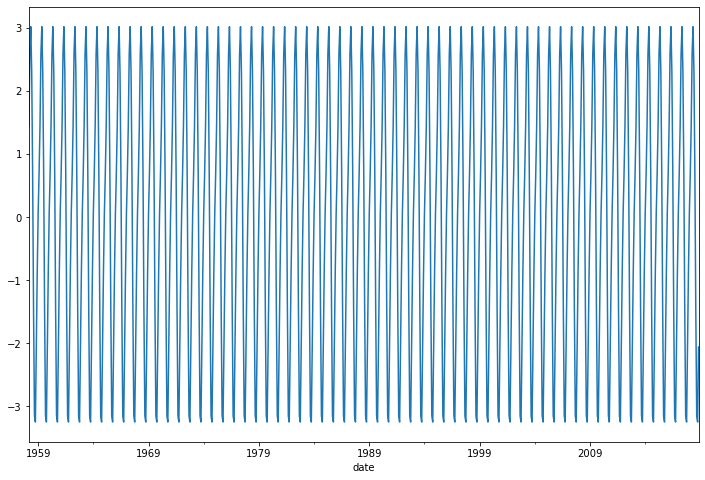

In [160]:
result.seasonal.plot(figsize=(12,8))

In [161]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.304
Date:                            Thu, 15 Oct 2020   AIC                            424.609
Time:                                    13:24:28   BIC                            452.151
Sample:                                         0   HQIC                           435.236
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3594      0.070      5.106      0.000       0.221       0.497
ar.L2          0.0895      0.030      2.979      0.003       0.031       0.148
ma.L1         -0.7122      0.061    -11.698      0.000      -0.832      -0.593
ar.S.L12       0.9996      0.000   2369.802      0.000       0.999       1.000
ma.S.L12      -0.8653      0.022    -39.952      0.000      -0.908      -0.823
sigma2         0.0957      0.005     20.453      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       43.95   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.31   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
len(df)

729

In [163]:
train = df.iloc[:717]
test = df.iloc[717:]

In [164]:
model = SARIMAX(train['interpolated'], order=(2,1,1),seasonal_order=(1,0,1,12))

In [165]:
results = model.fit()

In [167]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.889
Date:                            Thu, 15 Oct 2020   AIC                            415.778
Time:                                    13:28:51   BIC                            443.220
Sample:                                03-01-1958   HQIC                           426.375
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3458      0.083      4.154      0.000       0.183       0.509
ar.L2          0.0840      0.039      2.158      0.031       0.008       0.160
ma.L1         -0.7032      0.075     -9.432      0.000      -0.849      -0.557
ar.S.L12       0.9996      0.000   2879.070      0.000       0.999       1.000
ma.S.L12      -0.8653      0.023    -38.111      0.000      -0.910      -0.821
sigma2         0.0953      0.005     20.391      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       44.35   Jarque-Bera (JB):                 4.68
Prob(Q):                              0.29   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.01
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
start = len(train)
end = len(train) + len(test) - 1

In [169]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='date'>

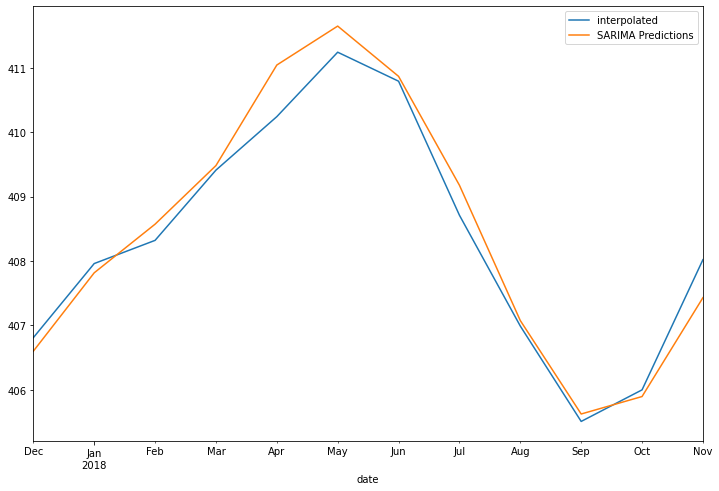

In [171]:
test['interpolated'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

In [172]:
from statsmodels.tools.eval_measures import rmse

In [174]:
error = rmse(test['interpolated'], predictions)
error

0.3581857245313432

In [175]:
test['interpolated'].mean()

408.3333333333333

## FORECAST INTO UNKWON FUTURE

In [177]:
model = SARIMAX(df['interpolated'], order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()

In [180]:
fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA FORECAST')

<AxesSubplot:xlabel='date'>

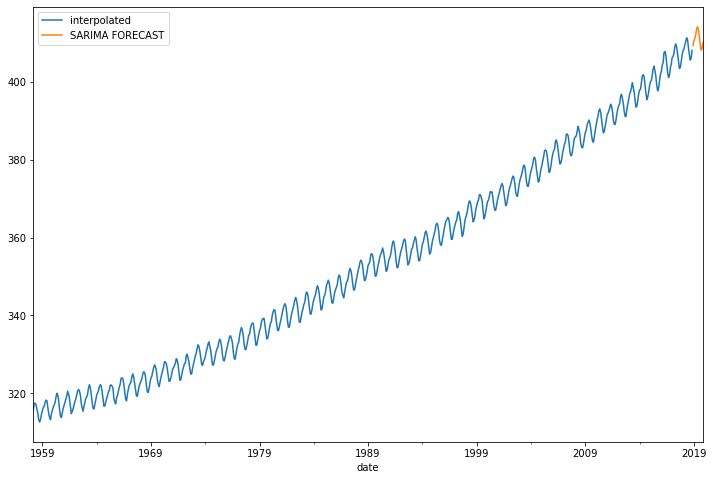

In [187]:
df['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)

# SARIMAX

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [3]:
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df.dropna()

In [7]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [10]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<AxesSubplot:xlabel='date'>

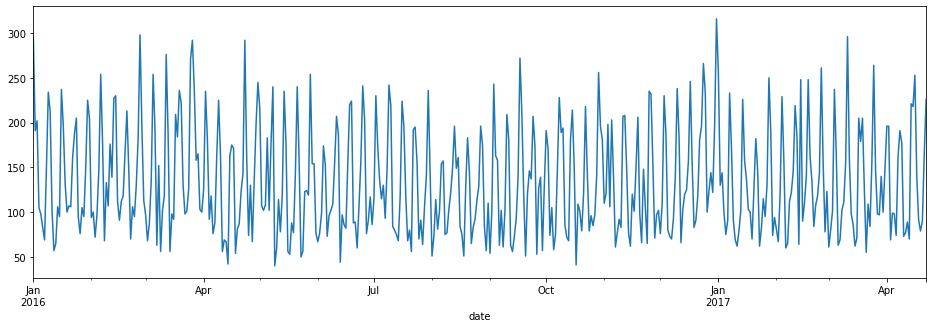

In [12]:
df1['total'].plot(figsize=(16,5))

In [13]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [14]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

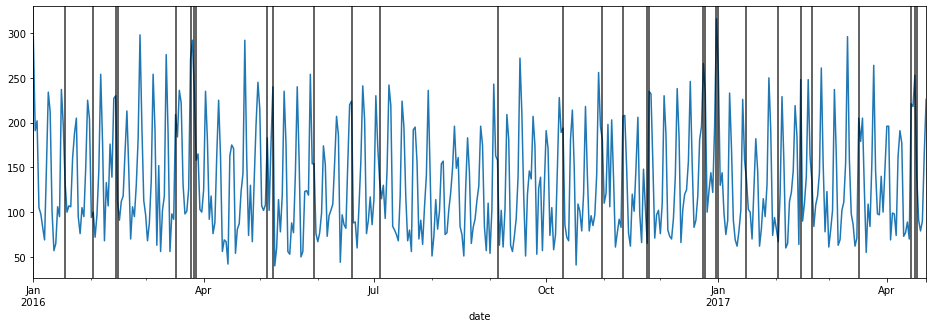

In [15]:
ax = df1['total'].plot(figsize=(16,5))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k',alpha=.8);

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

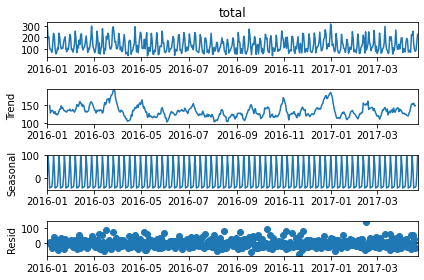

In [17]:
result = seasonal_decompose(df1['total'])
result.plot();

<AxesSubplot:xlabel='date'>

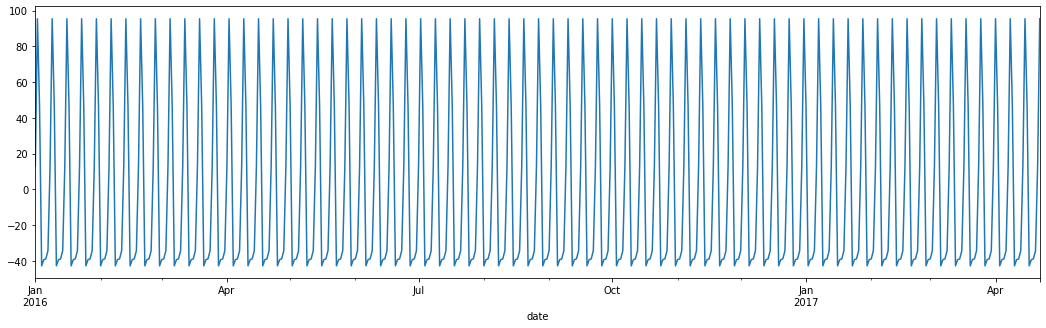

In [18]:
result.seasonal.plot(figsize=(18,5))

In [19]:
len(df1)

478

In [20]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [21]:
from pmdarima import auto_arima

In [22]:
auto_arima(df1['total'], seasonal=True, m=7, trace=True).summary()

Performing stepwise search to minimize aic


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.05 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4805.859, Time=0.63 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.37 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4948.132, Time=1.39 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.64 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.78 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4780.356, Time=0.66 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.130, Time=0.12 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=4926.360, Time=0.31 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=4887.689, Time=1.07 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=5010.582, Time=0.50 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=4859.657, Time=1.26 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.80 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(1,0,1)[7]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(1,0,1)[7] intercept
Total fit time: 17.200 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2386.178
Date:                   Thu, 15 Oct 2020   AIC                           4780.356
Time:                           19:17:46   BIC                           4797.035
Sample:                                0   HQIC                          4786.913
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6944      1.886      3.020      0.003       1.998       9.391
ar.S.L7        0.9571      0.014     67.726      0.000       0.929       0.985
ma.S.L7       -0.7553      0.050    -15.001      0.000      -0.854      -0.657
sigma2      1244.1294     74.922     16.606      0.000    1097.285    1390.973
===================================================================================
Ljung-Box (Q):                       74.35   Jarque-Bera (JB):                61.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# ValueError: non-invertible starting MA parameters found

model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,0,7),
               enforce_invertibility=False)
model_c = SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7),
               enforce_invertibility=False)

In [25]:
results = model.fit()
results_c = model_c.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Thu, 15 Oct 2020   AIC                           4457.403
Time:                                   19:17:47   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Thu, 15 Oct 2020   AIC                           4336.738
Time:                           19:17:47   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.57e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.206      0.000      -0.985      -0.891
sigma2      1111.7950     58.740     18.927      0.000     996.667    1226.923
===================================================================================
Ljung-Box (Q):                       67.58   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start = len(train)
end = len(train) + len(test) - 1

In [29]:
predictions = results.predict(start, end).rename('SARIMA Model')
predictions_c = results_c.predict(start,end).rename('SARIMA Model_c')

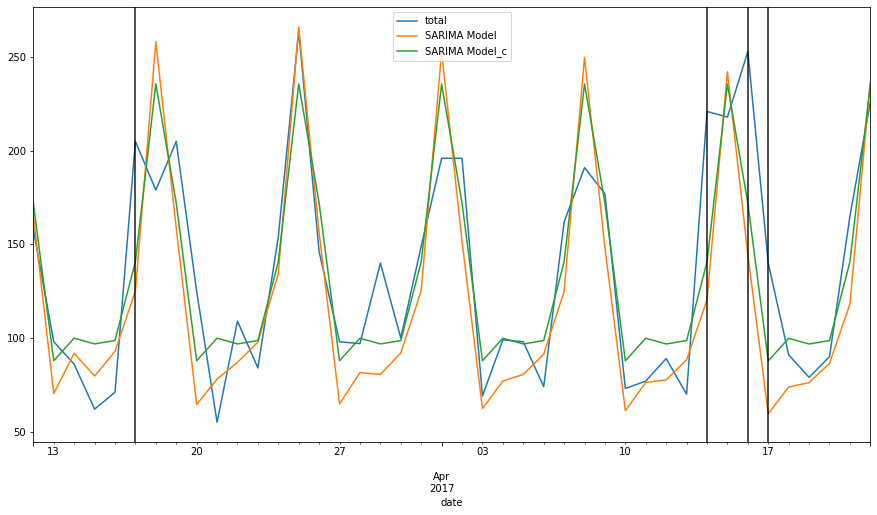

In [30]:
ax = test['total'].plot(figsize=(15,8), legend=True)
predictions.plot(legend=True)
predictions_c.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k',alpha=.9);

In [31]:
from statsmodels.tools.eval_measures import rmse

In [33]:
print(rmse(test['total'], predictions))
print(rmse(test['total'], predictions_c))
print(test['total'].mean())
print(predictions.mean())
print(predictions_c.mean())

41.26315495065604
31.912579096986363
134.26190476190476
120.72598706500457
133.08493968389868


In [34]:
# df1[['holiday']]

In [35]:
auto_arima(df1['total'], exogenous=df1[['holiday']],seasonal=True,m=7, trace=True).summary()

Performing stepwise search to minimize aic


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.07 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4804.111, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.20 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=1.39 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4728.053, Time=0.66 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=0.48 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.41 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4812.844, Time=1.24 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=1.04 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.65 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4829.768, Time=0.62 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5148.817, Time=0.97 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.90 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=4782.008, Time=0.79 sec


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,0,0)(1,0,1)[7]             : AIC=inf, Time=0.57 sec

Best model:  ARIMA(1,0,0)(1,0,1)[7] intercept
Total fit time: 15.776 seconds


C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2358.026
Date:                             Thu, 15 Oct 2020   AIC                           4728.053
Time:                                     19:18:35   BIC                           4753.070
Sample:                                 01-01-2016   HQIC                          4737.888
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.0587      2.907      6.557      0.000      13.362      24.755
holiday       52.1120      3.981     13.089      0.000      44.309      59.915
ar.L1          0.1580      0.042      3.768      0.000       0.076       0.240
ar.S.L7        0.8269      0.024     34.166      0.000       0.779       0.874
ma.S.L7       -0.3437      0.056     -6.180      0.000      -0.453      -0.235
sigma2       971.3466     61.369     15.828      0.000     851.066    1091.628
===================================================================================
Ljung-Box (Q):                      109.04   Jarque-Bera (JB):                 7.00
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.91   Skew:                             0.29
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train out SARIMAX

In [36]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),
               seasonal_order=(1,0,1,7), enforce_invertibility=False)
model_c = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,0),
                 seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [37]:
result = model.fit()
result_c = model_c.fit()

C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2175.956
Date:                           Thu, 15 Oct 2020   AIC                           4363.911
Time:                                   19:19:25   BIC                           4388.377
Sample:                               01-01-2016   HQIC                          4373.567
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      119.2207      3.207     37.177      0.000     112.935     125.506
ar.L1          0.9997      0.000   2763.806      0.000       0.999       1.000
ma.L1         -1.7406      0.089    -19.564      0.000      -1.915      -1.566
ar.S.L7        0.9997      0.001   1799.530      0.000       0.999       1.001
ma.S.L7       -1.0307      0.025    -41.893      0.000      -1.079      -0.982
sigma2       289.5149     20.075     14.422      0.000     250.169     328.861
===================================================================================
Ljung-Box (Q):                       77.56   Jarque-Bera (JB):                99.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.54
Prob(H) (two-sided):                  0.77   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
result_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Thu, 15 Oct 2020   AIC                           4188.417
Time:                                     19:19:25   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9355      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3163     44.867     17.369      0.000     691.378     867.254
===================================================================================
Ljung-Box (Q):                       36.17   Jarque-Bera (JB):                20.47
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
start = len(train)
end = len(train) + len(test) - 1

In [41]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')
predictions_c = result_c.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog c')

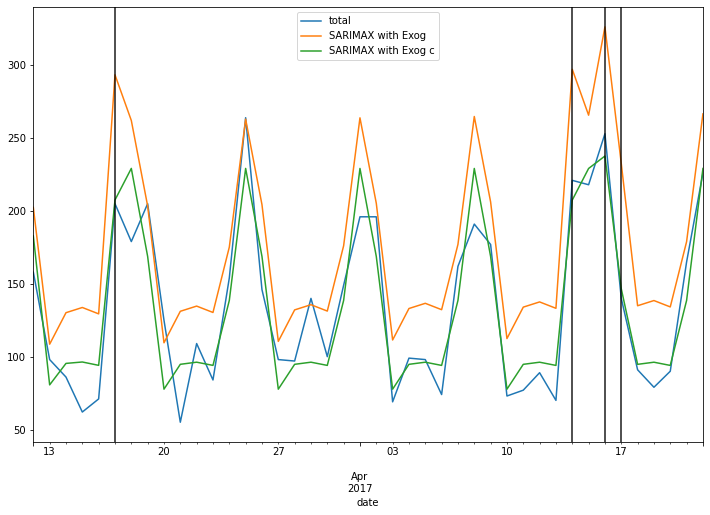

In [42]:
ax = test['total'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)
predictions_c.plot(legend=True)


for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k',alpha=.9);

In [44]:
print(rmse(test['total'], predictions))
print(rmse(test['total'], predictions_c))
print(test['total'].mean())
print(predictions.mean())
print(predictions_c.mean())

49.92655128660368
22.92975136294346
134.26190476190476
176.6705414607891
135.4431981814327


## FORECAST

In [45]:
model = SARIMAX(df1['total'],exog=df1[['holiday']], order=(1,0,1),
               seasonal_order=(1,0,1,7), enforce_invertibility=False)
model_c = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1,0,0),
                 seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [46]:
results = model.fit()
results_c = model_c.fit()

In [49]:
exog_forecast = df[478:][['holiday']]

In [51]:
fcast = results.predict(len(df1),len(df1)+38, exog = exog_forecast).rename('FINAL SARIMAX FORECAST')
fcast_c = results_c.predict(len(df1), len(df1)+38, exog = exog_forecast).rename('FINAL SARIMAX FORECAST_C')

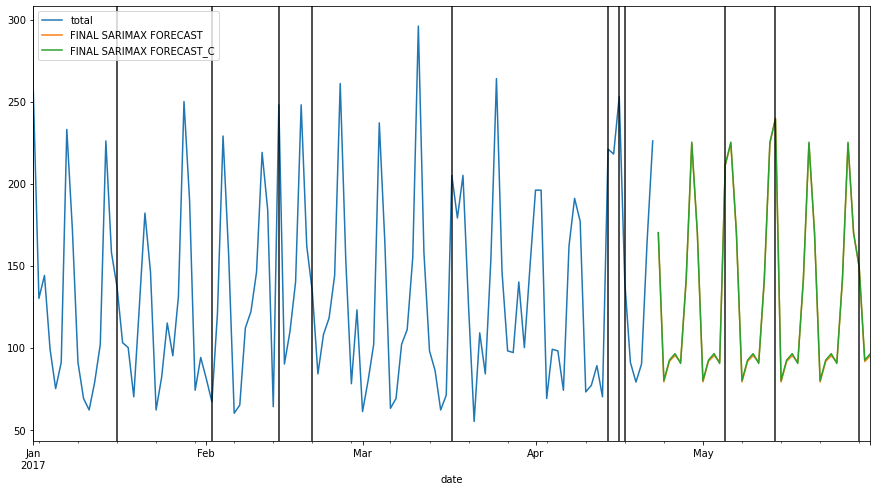

In [59]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)
fcast_c.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='k',alpha=.9);

In [56]:
from statsmodels.tools.eval_measures import rmse

In [57]:
rmse(fcast, fcast_c)

0.8548258765517648